## Machine Learning Bishop book figure 3-7

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a0 = -0.3; a1 = 0.5 # f(x) = a0 + a1x
alpha = 2  # perior precision
betta  = 25 # likelihood precision
noise_precision = betta

def gaussian_probability(x, mean, covariance):
    det_cov = np.linalg.det(covariance)
    inv_cov = np.linalg.inv(covariance)
    x_mu = x - mean
    return 1/(2*np.pi*np.sqrt(det_cov))*np.exp(-0.5 * np.diag(x_mu@inv_cov@np.transpose(x_mu)))

/tmp/ipykernel_18385/1174290367.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(w0, w1, P_prior, cmap='jet')


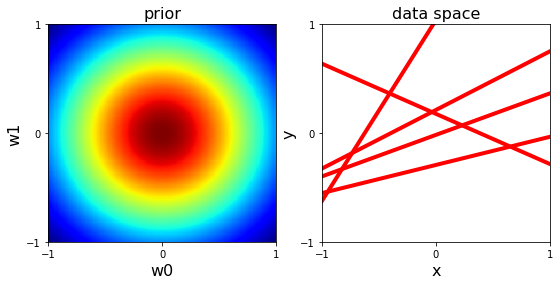

In [3]:
w0 = np.linspace(-1, 1, 200)
w1 = np.linspace(-1, 1, 200)
x = np.linspace(-1, 1, 200)
w0, w1 = np.meshgrid(w0, w1)
perior_mean = np.array([0, 0])
perior_cov = np.array([[1, 0],[0, 1]]) / alpha

P_prior = np.zeros(w0.shape)
for i in range(w0.shape[0]):
    W = np.stack((w0[i], w1[i]), 1)
    P_prior[i] = gaussian_probability(W, perior_mean, perior_cov)

# plot of prior
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.pcolor(w0, w1, P_prior, cmap='jet')
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.title('prior', fontsize=16)
plt.xlabel('w0', fontsize=16)
plt.ylabel('w1', fontsize=16)

sample_w = np.random.multivariate_normal(perior_mean, perior_cov, 6)
plt.subplot(1, 2, 2)
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title('data space', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
for i in range(6):
    plt.plot(x, sample_w[i][1]*x + sample_w[i][0], color='red', linewidth=4)

/tmp/ipykernel_18385/3198893445.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(w0, w1, P_likelihood, cmap='jet')
/tmp/ipykernel_18385/3198893445.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(w0, w1, P_posterior, cmap='jet')
/tmp/ipykernel_18385/3198893445.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals w

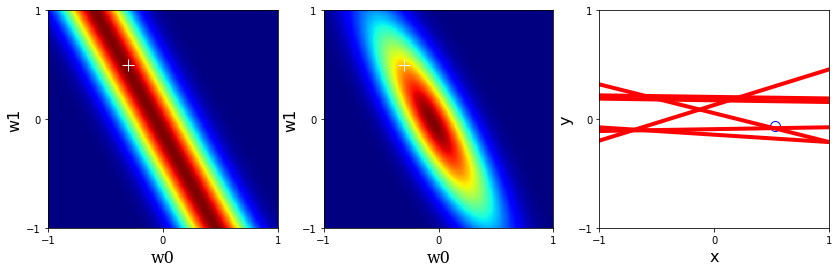

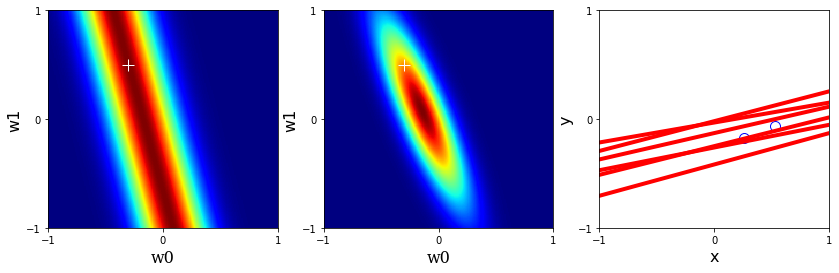

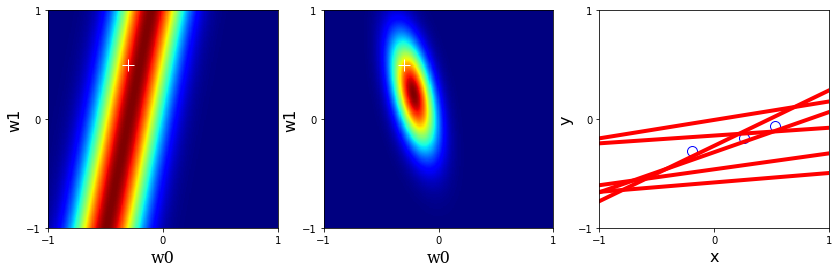

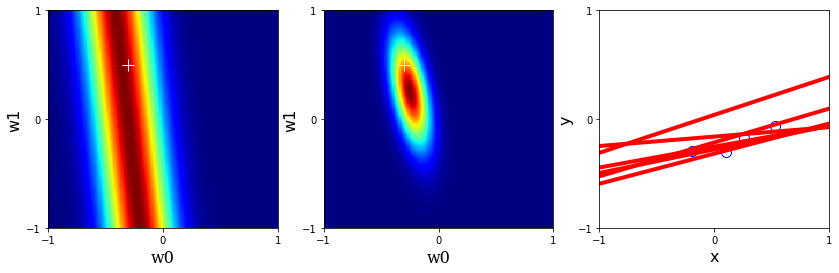

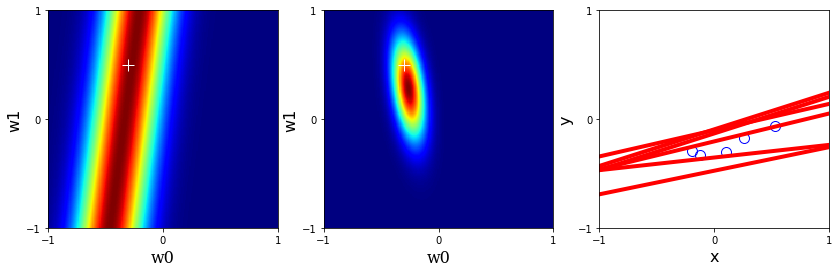

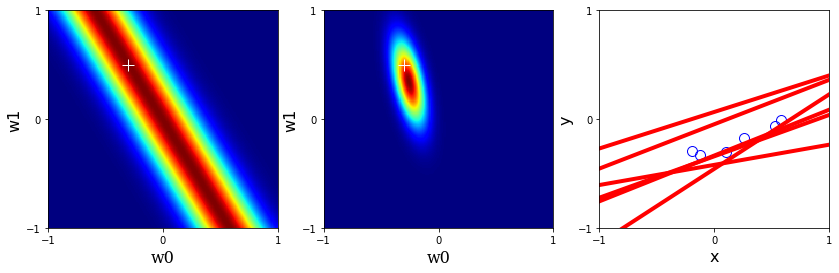

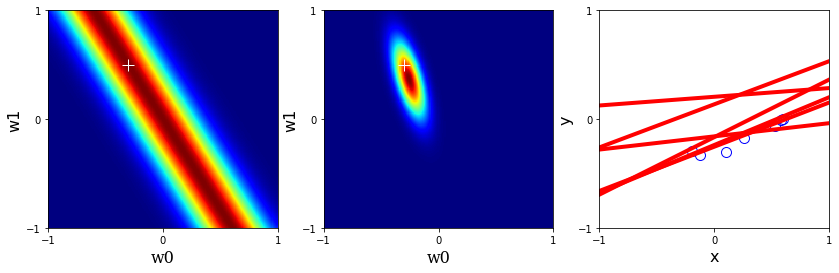

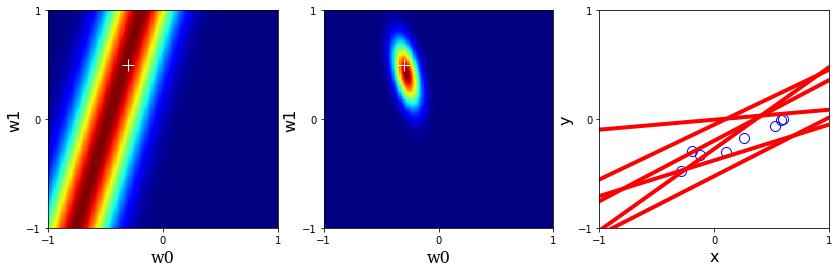

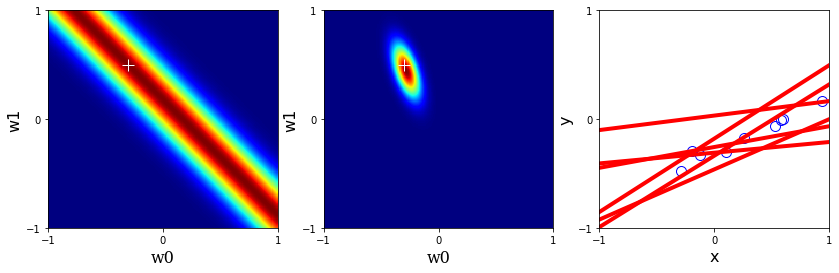

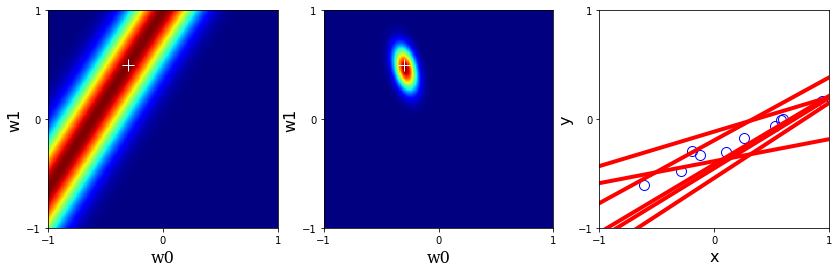

In [4]:
xn = np.random.uniform(-1, 1, 1)[0]
f_xn = a0 + a1 * xn
noise = np.random.normal(0, 1 / noise_precision, 1)[0]
tn = f_xn + noise

samples_x = []
P_posterior = P_prior

for itr in range(10):    
    samples_x.append([xn, tn])
    P_likelihood = np.zeros(w0.shape)
    likel_cov = np.array([[1, 0], [0, 1]]) / betta
    for i in range(w0.shape[0]):
        W = np.stack((w0[i], w1[i]), 1)
        likel_mean = np.array([-w1[i][0] * xn + tn, w1[i][0]]) # W0 + W1*x = t ==> W0 = -W1*x + t        
        P_likelihood[i] = gaussian_probability(W, likel_mean, likel_cov)

    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    plt.pcolor(w0, w1, P_likelihood, cmap='jet')
    plt.plot(a0, a1, 'w+', markersize=12)
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    plt.xlabel('w0', fontsize=16, family='serif')
    plt.ylabel('w1', fontsize=16)
    #'''
    P_posterior = P_likelihood * P_posterior    
    # determination of the posterior parameters using expectation
    Post_argmax = np.unravel_index(P_posterior.argmax(), P_posterior.shape)
    posterior_mean = np.array([-1 + Post_argmax[1] * 0.01, -1 + Post_argmax[0] * 0.01])
    posterior_cov = np.array([[1, 0],[0, 1]]) / 30
    
    plt.subplot(1, 3, 2)
    plt.pcolor(w0, w1, P_posterior, cmap='jet')
    plt.plot(a0, a1, 'w+', markersize=12)
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    plt.xlabel('w0', fontsize=16, family='serif')
    plt.ylabel('w1', fontsize=16)
    #'''
    sample_w = np.random.multivariate_normal(posterior_mean, posterior_cov, 6)
    plt.subplot(1, 3, 3)
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    plt.plot(np.reshape(samples_x, (itr + 1,2))[:,0], np.reshape(samples_x, (itr + 1,2))[:,1],
             'bo', mfc='none', markersize=10)
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    for i in range(6):
        plt.plot(x, sample_w[i][1]*x + sample_w[i][0], color='red', linewidth=4)
    #'''
    xn = np.random.uniform(-1, 1, 1)[0]
    f_xn = a0 + a1 * xn
    noise = np.random.normal(0, 1 / noise_precision, 1)[0]
    tn = f_xn + noise
